In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('/content/Fraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
42266,9,CASH_OUT,195364.06,C1096102092,0.0,0.00,C2021579766,506957.59,1343781.67,0.0,0.0
42267,9,CASH_OUT,546075.62,C1791035294,0.0,0.00,C1039162432,5075471.31,5621546.93,0.0,0.0
42268,9,CASH_OUT,111003.87,C1145755913,0.0,0.00,C743528393,2533159.94,2644163.81,0.0,0.0
42269,9,CASH_OUT,101025.44,C292739335,0.0,0.00,C299715257,156646.32,491301.04,0.0,0.0


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,42271.000000,4.227100e+04,4.227100e+04,4.227100e+04,4.227000e+04,4.227000e+04,42270.000000,42270.0
mean,7.171087,1.490108e+05,7.727734e+05,7.874065e+05,8.450982e+05,1.158405e+06,0.002224,0.0
std,2.118037,3.145005e+05,2.284003e+06,2.321941e+06,2.466743e+06,2.960508e+06,0.047105,0.0
min,1.000000,1.770000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,7.000000,7.031875e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,2.751283e+04,1.856733e+04,3.339900e+02,0.000000e+00,0.000000e+00,0.000000,0.0
75%,8.000000,1.794321e+05,1.421965e+05,1.500335e+05,4.337969e+05,8.013660e+05,0.000000,0.0
max,9.000000,1.000000e+07,2.854724e+07,2.861740e+07,2.958454e+07,3.130692e+07,1.000000,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42271 entries, 0 to 42270
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            42271 non-null  int64  
 1   type            42271 non-null  object 
 2   amount          42271 non-null  float64
 3   nameOrig        42271 non-null  object 
 4   oldbalanceOrg   42271 non-null  float64
 5   newbalanceOrig  42271 non-null  float64
 6   nameDest        42271 non-null  object 
 7   oldbalanceDest  42270 non-null  float64
 8   newbalanceDest  42270 non-null  float64
 9   isFraud         42270 non-null  float64
 10  isFlaggedFraud  42270 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.5+ MB


In [9]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [10]:
for column in df.select_dtypes(include=['number']).columns:
    df[column].fillna(df[column].mean(), inplace=True)
df

<ipython-input-10-942da9edf89e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.000000e+00,0.000000e+00,0.000000,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.000000e+00,0.000000e+00,0.000000,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.000000e+00,0.000000e+00,1.000000,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,2.118200e+04,0.000000e+00,1.000000,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.000000e+00,0.000000e+00,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
42266,9,CASH_OUT,195364.06,C1096102092,0.0,0.00,C2021579766,5.069576e+05,1.343782e+06,0.000000,0.0
42267,9,CASH_OUT,546075.62,C1791035294,0.0,0.00,C1039162432,5.075471e+06,5.621547e+06,0.000000,0.0
42268,9,CASH_OUT,111003.87,C1145755913,0.0,0.00,C743528393,2.533160e+06,2.644164e+06,0.000000,0.0
42269,9,CASH_OUT,101025.44,C292739335,0.0,0.00,C299715257,1.566463e+05,4.913010e+05,0.000000,0.0


In [11]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
df

<ipython-input-11-1221f6555029>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.000000e+00,0.000000e+00,0.000000,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.000000e+00,0.000000e+00,0.000000,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.000000e+00,0.000000e+00,1.000000,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,2.118200e+04,0.000000e+00,1.000000,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.000000e+00,0.000000e+00,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
42266,9,CASH_OUT,195364.06,C1096102092,0.0,0.00,C2021579766,5.069576e+05,1.343782e+06,0.000000,0.0
42267,9,CASH_OUT,546075.62,C1791035294,0.0,0.00,C1039162432,5.075471e+06,5.621547e+06,0.000000,0.0
42268,9,CASH_OUT,111003.87,C1145755913,0.0,0.00,C743528393,2.533160e+06,2.644164e+06,0.000000,0.0
42269,9,CASH_OUT,101025.44,C292739335,0.0,0.00,C299715257,1.566463e+05,4.913010e+05,0.000000,0.0


In [12]:
df = df.drop_duplicates()
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.000000e+00,0.000000e+00,0.000000,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.000000e+00,0.000000e+00,0.000000,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.000000e+00,0.000000e+00,1.000000,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,2.118200e+04,0.000000e+00,1.000000,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.000000e+00,0.000000e+00,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
42266,9,CASH_OUT,195364.06,C1096102092,0.0,0.00,C2021579766,5.069576e+05,1.343782e+06,0.000000,0.0
42267,9,CASH_OUT,546075.62,C1791035294,0.0,0.00,C1039162432,5.075471e+06,5.621547e+06,0.000000,0.0
42268,9,CASH_OUT,111003.87,C1145755913,0.0,0.00,C743528393,2.533160e+06,2.644164e+06,0.000000,0.0
42269,9,CASH_OUT,101025.44,C292739335,0.0,0.00,C299715257,1.566463e+05,4.913010e+05,0.000000,0.0


In [13]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


<ipython-input-14-006b2aada8a4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='viridis')


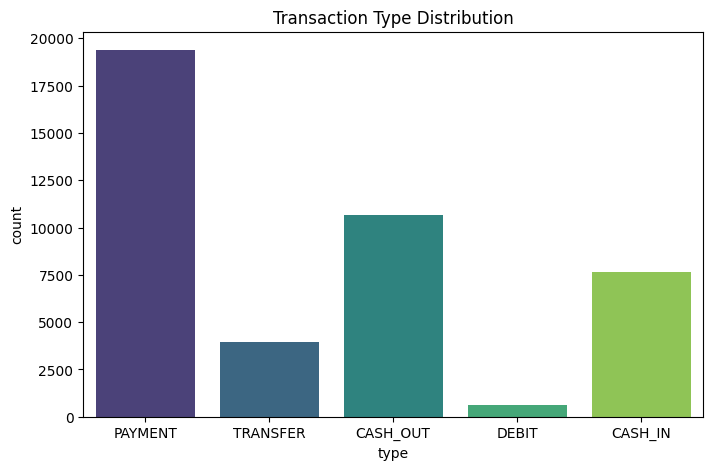

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=df, palette='viridis')
plt.title("Transaction Type Distribution")
plt.show()

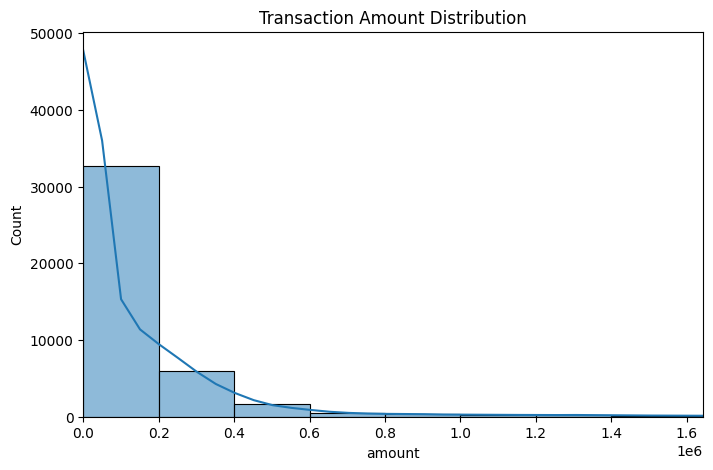

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['amount'], bins=50, kde=True)
plt.xlim(0, df['amount'].quantile(0.99))  # Avoid extreme outliers
plt.title("Transaction Amount Distribution")
plt.show()

<ipython-input-18-4251647d8a77>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isFraud', data=df, palette='coolwarm')


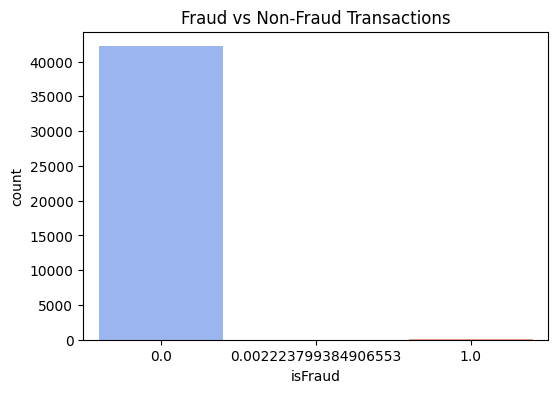

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df, palette='coolwarm')
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

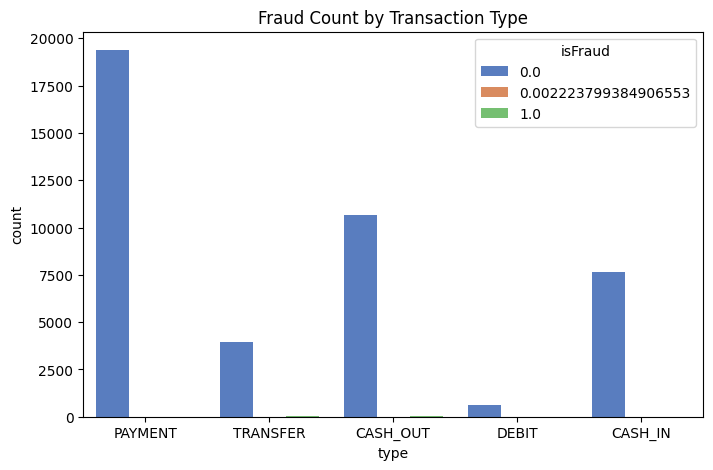

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='type', hue='isFraud', data=df, palette='muted')
plt.title("Fraud Count by Transaction Type")
plt.show()

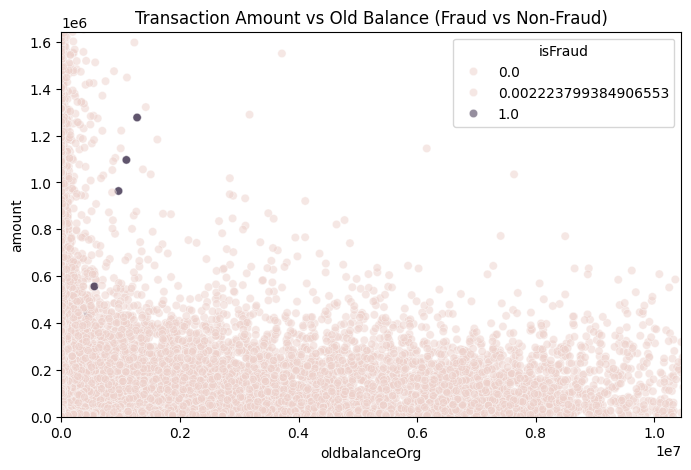

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['oldbalanceOrg'], y=df['amount'], hue=df['isFraud'], alpha=0.5)
plt.xlim(0, df['oldbalanceOrg'].quantile(0.99))
plt.ylim(0, df['amount'].quantile(0.99))
plt.title("Transaction Amount vs Old Balance (Fraud vs Non-Fraud)")
plt.show()

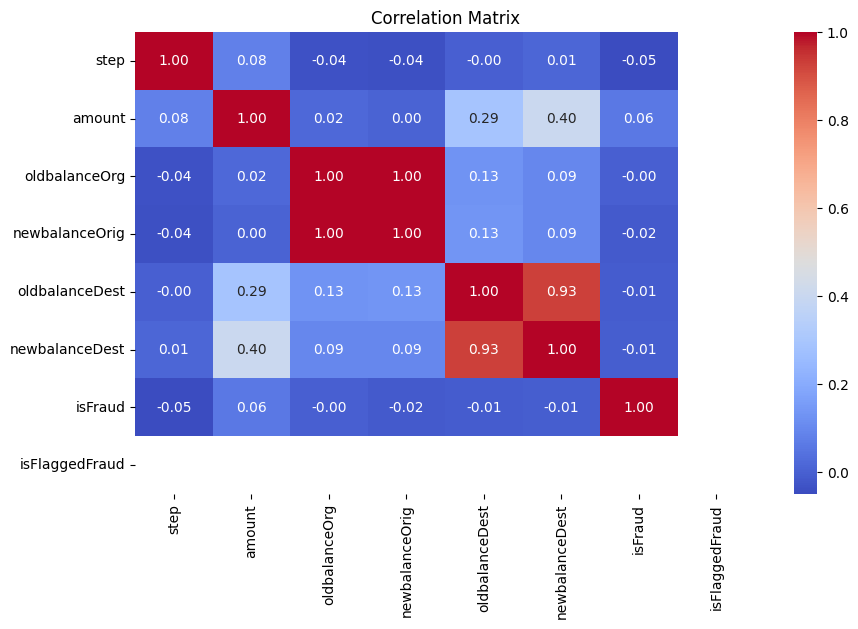

In [22]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()